<a href="https://colab.research.google.com/github/leonichel/Modulation_FM-AM-PM/blob/main/Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modulação por frequência (FM)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.fft import fft, fftfreq

In [ ]:
sns.set_palette('husl')
sns.set_style('darkgrid')

In [ ]:
modulator_frequency = 4.0
carrier_frequency = 40.0
modulation_index = 1.0

N = 600
T = 1/800

In [ ]:
df = pd.DataFrame()

df['Tempo'] = np.linspace(0.0, N*T, N, endpoint=False)
df['Sinal'] = np.sin(2.0 * np.pi * modulator_frequency * df['Tempo']) * modulation_index
df['Portadora'] = np.sin(2.0 * np.pi * carrier_frequency * df['Tempo'])
df['Sinal modulado'] = np.sin(2. * np.pi * (carrier_frequency * df['Tempo'] + df['Sinal']))

df['Frequências'] = fftfreq(N, T)
df['fft Sinal'] = fft(df['Sinal'].values)
df['fft Portadora'] = fft(df['Portadora'].values)
df['fft Sinal modulado'] = fft(df['Sinal modulado'].values)

df

,Tempo,Sinal,Portadora,Sinal modulado,Frequências,fft Sinal,fft Portadora,fft Sinal modulado
0,0.00000,0.000000,0.000000,0.000000,0.000000,-6.976024e-15-0.000000e+00j,-1.664035e-14-0.000000e+00j,-9.880985e-14-0.000000e+00j
1,0.00125,0.031411,0.309017,0.489502,1.333333,1.164679e-15+5.359284e-15j,1.234489e-14-1.173098e-14j,7.402695e-14-1.997780e-13j
2,0.00250,0.062791,0.587785,0.853593,2.666667,4.274604e-15+1.316149e-14j,-2.447517e-14+1.242798e-14j,-1.422843e-13+1.945871e-13j
3,0.00375,0.094108,0.809017,0.999315,4.000000,-6.094507e-14-3.000000e+02j,8.141828e-14+7.220423e-16j,-8.338145e-14+7.792818e+00j
4,0.00500,0.125333,0.951057,0.890054,5.333333,9.153020e-15-9.985134e-15j,9.788815e-14-3.814290e-14j,7.156080e-14-1.574732e-13j
...,...,...,...,...,...,...,...,...
595,0.74375,-0.156434,-1.000000,-0.554606,-6.666667,1.935576e-15+1.241058e-14j,1.977895e-16-1.227200e-14j,-1.847180e-14-1.912988e-14j
596,0.74500,-0.125333,-0.951057,-0.890054,-5.333333,9.153020e-15+9.985134e-15j,9.788815e-14+3.814290e-14j,7.156080e-14+1.574732e-13j
597,0.74625,-0.094108,-0.809017,-0.999315,-4.000000,-6.094507e-14+3.000000e+02j,8.141828e-14-7.220423e-16j,-8.338145e-14-7.792818e+00j
598,0.74750,-0.062791,-0.587785,-0.853593,-2.666667,4.274604e-15-1.316149e-14j,-2.447517e-14-1.242798e-14j,-1.422843e-13-1.945871e-13j


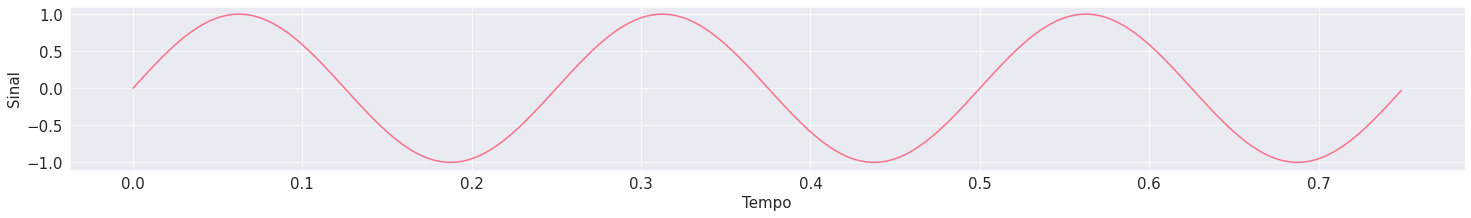

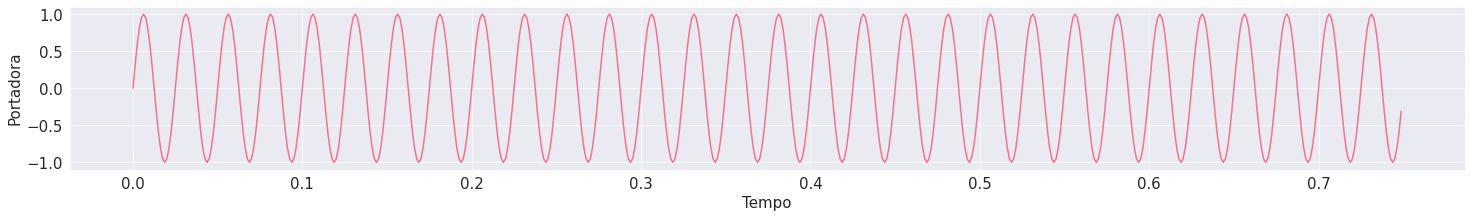

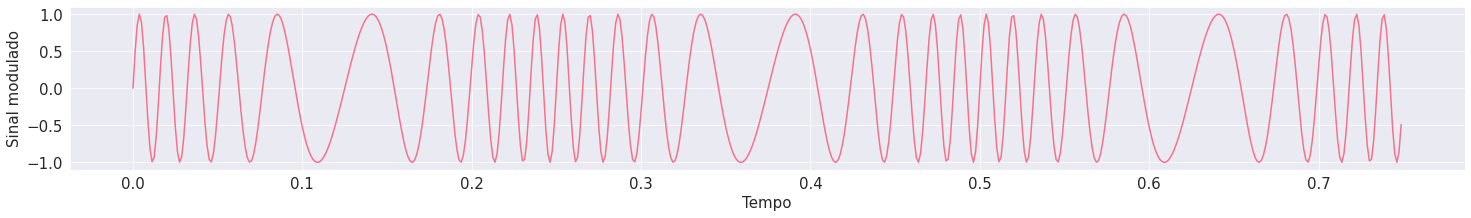

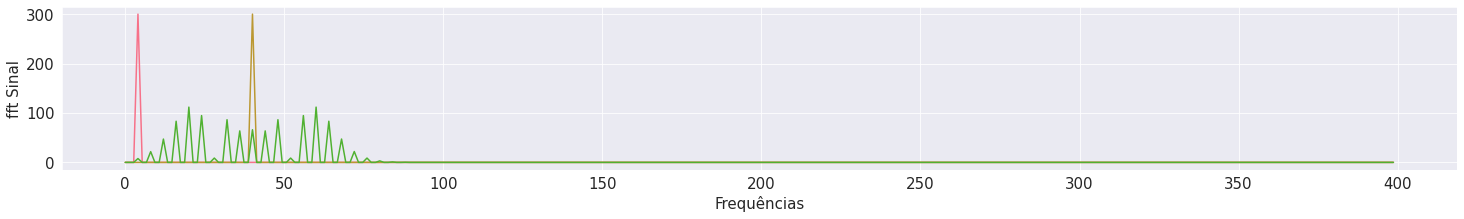

In [ ]:
plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Sinal')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Portadora')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Sinal modulado')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Sinal'][0:N//2]))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Portadora'][0:N//2]))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Sinal modulado'][0:N//2]))
plt.show();

# Modulação por amplitude (AM)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.fft import fft, fftfreq

In [ ]:
sns.set_palette('husl')
sns.set_style('darkgrid')

In [ ]:
carrier_amplitude = 3.0
carrier_frequency = 40.0
modulator_amplitude = 2.0
modulator_frequency = 5.0
modulation_index = 1.0

N = 600
T = 1/800

In [ ]:
df = pd.DataFrame()

df['Tempo'] = np.linspace(0.0, N*T, N, endpoint=False)
df['Sinal'] = modulator_amplitude * np.sin(2.0 * np.pi * modulator_frequency * df['Tempo'])
df['Portadora'] = carrier_amplitude * np.sin(2.0 * np.pi * carrier_frequency * df['Tempo'])
df['Sinal modulado'] = carrier_amplitude * (1 + modulation_index * np.cos(2*np.pi*modulator_frequency*df['Tempo']) * np.cos(2*np.pi*carrier_frequency*df['Tempo']))

df['Frequências'] = fftfreq(N, T)
df['fft Sinal'] = fft(df['Sinal'].values)
df['fft Portadora'] = fft(df['Portadora'].values)
df['fft Sinal modulado'] = fft(df['Sinal modulado'].values)

df

,Tempo,Sinal,Portadora,Sinal modulado,Frequências,fft Sinal,fft Portadora,fft Sinal modulado
0,0.00000,0.000000,0.000000,6.000000,0.000000,51.923037-0.000000j,-5.480604e-14-0.000000e+00j,1802.722475-0.000000j
1,0.00125,0.078520,0.927051,5.850970,1.333333,55.821952+14.622678j,3.895434e-14-3.731339e-14j,2.726677+0.336672j
2,0.00250,0.156918,1.763356,5.419569,2.666667,72.168336+37.963428j,-6.815679e-14+3.662896e-14j,2.739380+0.675832j
3,0.00375,0.235075,2.427051,4.751133,4.000000,142.464515+113.182085j,2.512691e-13-3.643024e-15j,2.760890+1.020035j
4,0.00500,0.312869,2.853170,3.915637,5.333333,-368.656736-394.286554j,2.904052e-13-1.156809e-13j,2.791729+1.371969j
...,...,...,...,...,...,...,...,...
595,0.74375,-1.961571,-3.000000,3.000000,-6.666667,-64.487437+87.299127j,-3.035146e-14-5.338424e-14j,2.832667-1.734535j
596,0.74500,-1.975377,-2.853170,2.854977,-5.333333,-368.656736+394.286554j,2.904052e-13+1.156809e-13j,2.791729-1.371969j
597,0.74625,-1.986137,-2.427051,2.792740,-4.000000,142.464515-113.182085j,2.512691e-13+3.643024e-15j,2.760890-1.020035j
598,0.74750,-1.993835,-1.763356,2.809576,-2.666667,72.168336-37.963428j,-6.815679e-14-3.662896e-14j,2.739380-0.675832j


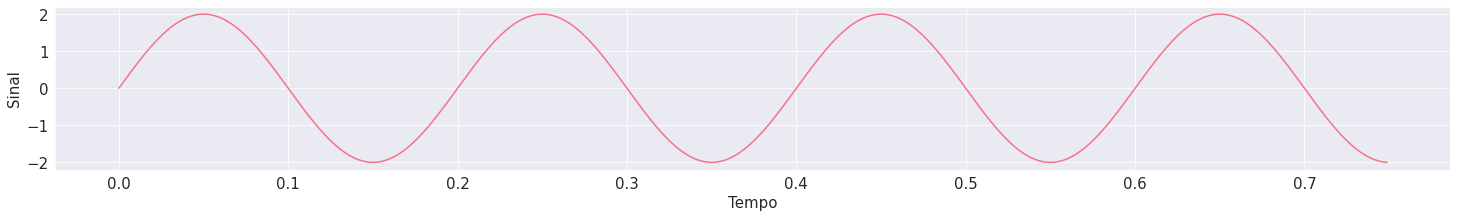

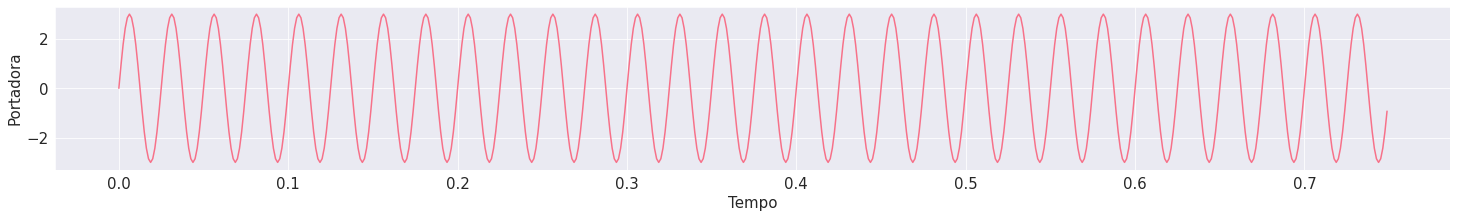

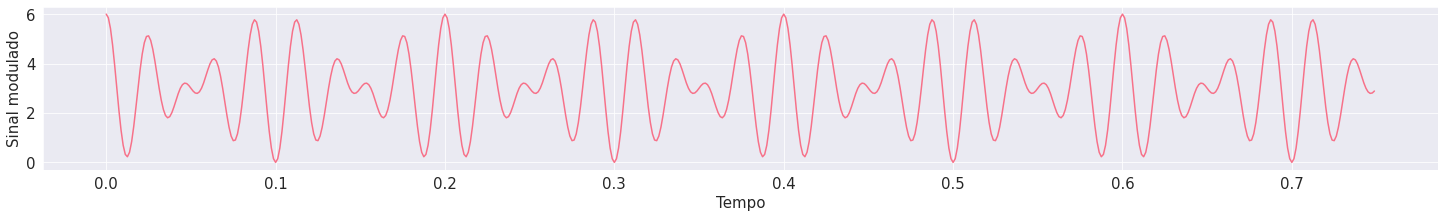

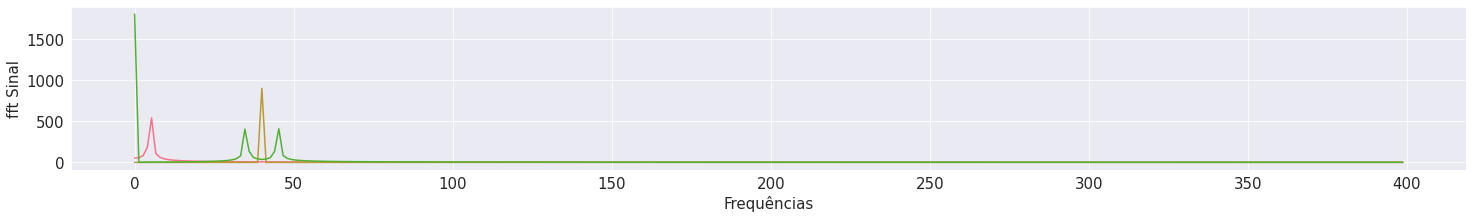

In [ ]:
plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Sinal')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Portadora')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Sinal modulado')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Sinal'][0:N//2]))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Portadora'][0:N//2]))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Sinal modulado'][0:N//2]))
plt.show();

# Modulação por fase (PM)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.fft import fft, fftfreq

In [ ]:
sns.set_palette('husl')
sns.set_style('darkgrid')

In [ ]:
carrier_frequency = 40.0
modulator_frequency = 5.0
modulation_index = 1.0

N = 600
T = 1/800

In [ ]:
df = pd.DataFrame()

df['Tempo'] = np.linspace(0.0, N*T, N, endpoint=False)
df['Sinal'] = np.sin(2.0 * np.pi * modulator_frequency * df['Tempo'])
df['Portadora'] = np.sin(2.0 * np.pi * carrier_frequency * df['Tempo'])
df['Sinal modulado'] = np.sin(carrier_frequency * np.pi * df['Tempo'] + modulation_index * df['Sinal'])

df['Frequências'] = fftfreq(N, T)
df['fft Sinal'] = fft(df['Sinal'].values)
df['fft Portadora'] = fft(df['Portadora'].values)
df['fft Sinal modulado'] = fft(df['Sinal modulado'].values)

df

,Tempo,Sinal,Portadora,Sinal modulado,Frequências,fft Sinal,fft Portadora,fft Sinal modulado
0,0.00000,0.000000,0.000000,0.000000,0.000000,25.961518-0.000000j,-1.664035e-14-0.000000e+00j,2.398303-0.000000j
1,0.00125,0.039260,0.309017,0.195080,1.333333,27.910976+7.311339j,1.234489e-14-1.173098e-14j,2.392281+0.311386j
2,0.00250,0.078459,0.587785,0.382609,2.666667,36.084168+18.981714j,-2.447517e-14+1.242798e-14j,2.338830+0.557012j
3,0.00375,0.117537,0.809017,0.555344,4.000000,71.232258+56.591042j,8.141828e-14+7.220423e-16j,1.872722+0.341430j
4,0.00500,0.156434,0.951057,0.706650,5.333333,-184.328368-197.143277j,9.788815e-14-3.814290e-14j,7.222522+5.820731j
...,...,...,...,...,...,...,...,...
595,0.74375,-0.980785,-1.000000,-0.980973,-6.666667,-32.243718+43.649563j,1.977895e-16-1.227200e-14j,5.168311-3.544982j
596,0.74500,-0.987688,-0.951057,-0.998978,-5.333333,-184.328368+197.143277j,9.788815e-14+3.814290e-14j,7.222522-5.820731j
597,0.74625,-0.993068,-0.809017,-0.994335,-4.000000,71.232258-56.591042j,8.141828e-14-7.220423e-16j,1.872722-0.341430j
598,0.74750,-0.996917,-0.587785,-0.966462,-2.666667,36.084168-18.981714j,-2.447517e-14-1.242798e-14j,2.338830-0.557012j


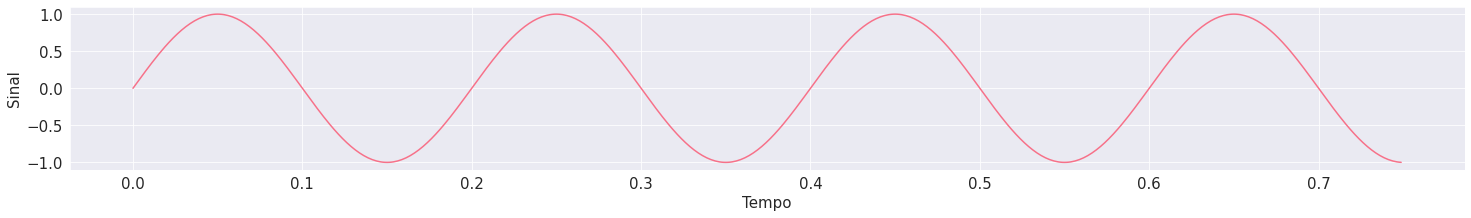

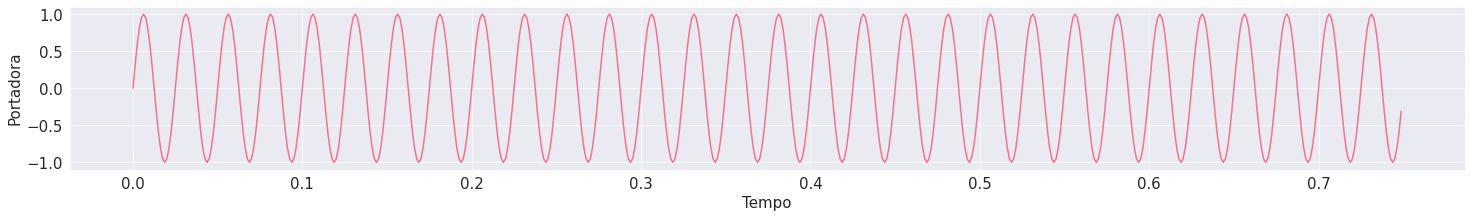

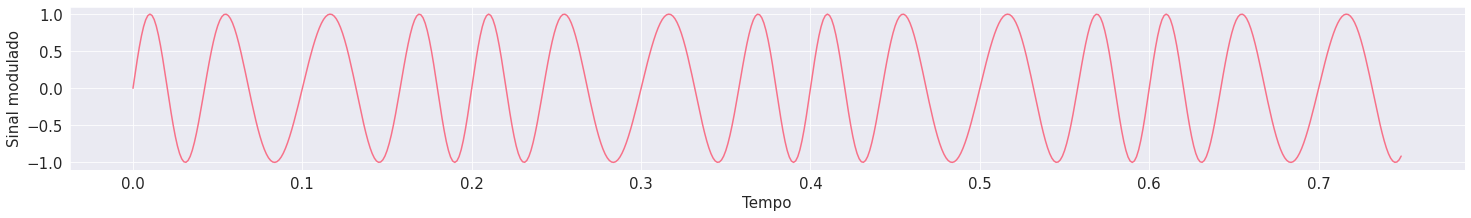

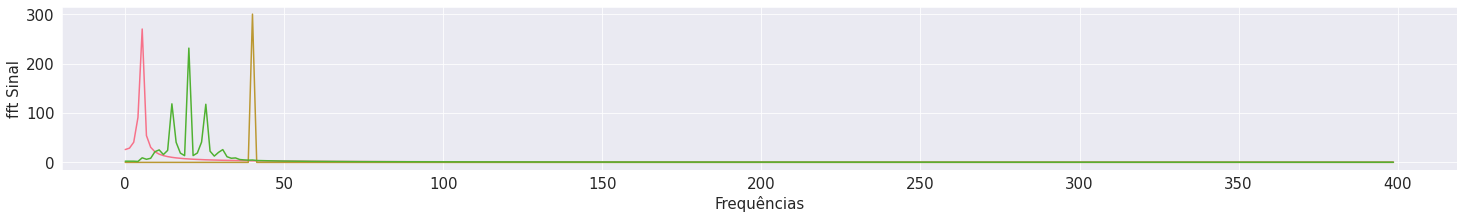

In [ ]:
plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Sinal')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Portadora')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(data=df, x='Tempo', y='Sinal modulado')
plt.show();

plt.figure(figsize=(25,3))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Sinal'][0:N//2]))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Portadora'][0:N//2]))
sns.lineplot(x=df['Frequências'][:N//2],y=abs(df['fft Sinal modulado'][0:N//2]))
plt.show();